**例4-X** 考虑下图所示的长为$2\mathrm{m}$、 横截面积为$A=1\mathrm{m}^2$、 弹性模量为$E=10^4\mathrm{N}\mathrm{m}^{-2}$的一维均质杆，杆上作用有分布力$b(x)=x$， 左端固定， 右端作用有面力$\bar{t}=-1\mathrm{N}\mathrm{m}^{-2}$。应力精确解为$\sigma(x) = -\frac{x^{2}}{2}+1$。
![一维等截面弹性杆](.\images\Example-SPR.png)
利用bar1D-python程序采用4个均匀单元计算，可以得到各单元中点（超收敛点）的有限元应力为
$$
\hat{\boldsymbol{\sigma}} = [ 0.958333, 0.708333, 0.208333, -0.541667]^{\mathrm{T}}
$$
超收敛点的坐标为
$$
\boldsymbol{x} = [ 0.25, 0.75, 1.25, 1.75]^{\mathrm{T}}
$$
试分别用最小二乘法和超收敛分片重构法重构应力场。

解：

单元形函数为
$$
N_1^{(1)}(x) = 1-2x, N_2^{(1)}(x) = 2x;  \\
N_1^{(2)}(x) = 2(1-x), N_2^{(2)}(x) = 2x-1;  \\
N_1^{(3)}(x) = 3-2x, N_2^{(3)}(x) = 2(x-1);  \\
N_1^{(4)}(x) = 2(2-x), N_2^{(2)}(x) = 2x-3;
$$

In [1]:
from IPython.display import display, Latex, Math
import sympy
sympy.init_printing(use_latex='mathjax')

x,s1,s2,s3,s4,s5 = sympy.symbols('x,\sigma_1,\sigma_2,\sigma_3,\sigma_4,\sigma_5')
N11,N21,N12,N22,N13,N23,N14,N24 = sympy.symbols('N_1^(1),N_2^(1),N_1^(2),N_2^(2),N_1^(3),N_2^(3),N_1^(4),N_2^(4)')
sr1,sr2,sr3,sr4 = sympy.symbols('\sigma^{*(1)}, \sigma^{*(2)}, \sigma^{*(3)}, \sigma^{*(4)}')
se1,se2,se3,se4 = sympy.symbols('\sigma^{(1)}, \sigma^{(2)}, \sigma^{(3)}, \sigma^{(4)}')

# 单元超收敛点处的应力
se1 = 0.958333 
se2 = 0.708333
se3 = 0.208333
se4 =-0.541667

# Nie: 单元e节点i的形函数
N11 = 1-2*x 
N21 = 2*x
N12 = 2*(1-x) 
N22 = 2*x-1
N13 = 3-2*x 
N23 = 2*(x-1)
N14 = 2*(2-x) 
N24 = 2*x-3

**1. 最小二乘法**

重构应力场为
$$
\sigma^* = \begin{cases}
N_1^{(1)}(x) \tilde{\sigma}_1 + N_2^{(1)}(x) \tilde{\sigma}_2 & 0 \le x < 0.5 \\
N_1^{(2)}(x) \tilde{\sigma}_2 + N_2^{(2)}(x) \tilde{\sigma}_3 & 0.5 \le x < 1 \\
N_1^{(3)}(x) \tilde{\sigma}_3 + N_2^{(3)}(x) \tilde{\sigma}_4 & 1 \le x < 1.5 \\
N_1^{(4)}(x) \tilde{\sigma}_4 + N_2^{(4)}(x) \tilde{\sigma}_5 & 1.5 \le x \le 2
\end{cases}
$$
式中$\tilde{\sigma}_I$为待重构的节点应力。

将权系数矩阵$\boldsymbol{C}$取为单位阵，系数矩阵和右端项为
$$
   \boldsymbol{A} = \sum_{e=1}^{4} \int_{\Omega^e} \boldsymbol{N}^{*\mathrm{T}} \boldsymbol{N} \mathrm{d}\Omega
$$
$$
   \boldsymbol{b} = \sum_{e=1}^{4} \int_{\Omega^e} \boldsymbol{N}^{*\mathrm{T}} \sigma^e \mathrm{d}\Omega
$$

In [2]:
# 对于单元1
Ne = sympy.Matrix([[N11, N21]])
A1 = sympy.integrate(Ne.T @ Ne, (x,0,sympy.nsimplify(0.5, tolerance=0.00001, rational=True)))
display('A1 = ', A1)

b1 = sympy.integrate(Ne.T * se1, (x,0,sympy.nsimplify(0.5, tolerance=0.00001, rational=True)))
display('b1 = ', b1)

# 对于单元2
Ne = sympy.Matrix([[N12, N22]])
A2 = sympy.integrate(Ne.T @ Ne, (x,sympy.nsimplify(0.5, tolerance=0.00001, rational=True),1))
display('A2 = ', A2)

b2 = sympy.integrate(Ne.T * se2, (x,sympy.nsimplify(0.5, tolerance=0.00001, rational=True),1))
display('b2 = ', b2)

# 对于单元3
Ne = sympy.Matrix([[N13, N23]])
A3 = sympy.integrate(Ne.T @ Ne, (x,1, sympy.nsimplify(1.5, tolerance=0.00001, rational=True)))
display('A3 = ', A3)

b3 = sympy.integrate(Ne.T * se3, (x,1,sympy.nsimplify(1.5, tolerance=0.00001, rational=True)))
display('b3 = ', b3)

# 对于单元4
Ne = sympy.Matrix([[N14, N24]])
A4 = sympy.integrate(Ne.T @ Ne, (x, sympy.nsimplify(1.5, tolerance=0.00001, rational=True), 2))
display('A4 = ', A4)

b4 = sympy.integrate(Ne.T * se4, (x,sympy.nsimplify(1.5, tolerance=0.00001, rational=True), 2))
display('b4 = ', b4)


'A1 = '

⎡1/6   1/12⎤
⎢          ⎥
⎣1/12  1/6 ⎦

'b1 = '

⎡0.23958325⎤
⎢          ⎥
⎣0.23958325⎦

'A2 = '

⎡1/6   1/12⎤
⎢          ⎥
⎣1/12  1/6 ⎦

'b2 = '

⎡0.17708325⎤
⎢          ⎥
⎣0.17708325⎦

'A3 = '

⎡1/6   1/12⎤
⎢          ⎥
⎣1/12  1/6 ⎦

'b3 = '

⎡0.05208325⎤
⎢          ⎥
⎣0.05208325⎦

'A4 = '

⎡1/6   1/12⎤
⎢          ⎥
⎣1/12  1/6 ⎦

'b4 = '

⎡-0.13541675⎤
⎢           ⎥
⎣-0.13541675⎦

得方程组
\begin{align}
   \left[\begin{array}{ccccc}
\frac{1}{6} & \frac{1}{12} & 0 & 0 & 0 \\
\frac{1}{12} & \frac{1}{3} & \frac{1}{12} & 0 & 0 \\
0 & \frac{1}{12} & \frac{1}{3} & \frac{1}{12} & 0 \\
0 & 0 & \frac{1}{12} & \frac{1}{3} & \frac{1}{12} \\
0 & 0 & 0& \frac{1}{12} & \frac{1}{6}\\
\end{array}\right]\left[\begin{array}{c}
\tilde{\sigma}_{1} \\
\tilde{\sigma}_{2} \\
\tilde{\sigma}_{3} \\
\tilde{\sigma}_{4} \\
\tilde{\sigma}_{5} \\
\end{array}\right]=\left[\begin{array}{c}
0.23958325 \\
0.4166665 \\
0.2291665 \\
−0.0833334999999996 \\
−0.13541675
\end{array}\right] 
\end{align}
解得：
\begin{align}
\tilde{\sigma}_{1} &= 1.00297585714286 \\
\tilde{\sigma}_{2} &= 0.869047285714286 \\
\tilde{\sigma}_{3} &= 0.520833 \\
\tilde{\sigma}_{4} &= −0.202381285714284 \\
\tilde{\sigma}_{5} &= −0.711309857142858
\end{align}

In [3]:
LM = sympy.Matrix([[0,1,2,3],[1,2,3,4]])
A = sympy.zeros(5,5)
b = sympy.zeros(5,1)

def assembly(e, ke, fe):
    for loop1 in range(2):
        i = LM[loop1, e]
        b[i] += fe[loop1]
        for loop2 in range(2):
            j = LM[loop2, e]
            A[i, j] += ke[loop1, loop2]

assembly(0,A1,b1)
assembly(1,A2,b2)
assembly(2,A3,b3)
assembly(3,A4,b4)

display('A = ', A)
display('b = ', b)

s = A.inv() @ b
display('s = ', s)

'A = '

⎡1/6   1/12   0     0     0  ⎤
⎢                            ⎥
⎢1/12  1/3   1/12   0     0  ⎥
⎢                            ⎥
⎢ 0    1/12  1/3   1/12   0  ⎥
⎢                            ⎥
⎢ 0     0    1/12  1/3   1/12⎥
⎢                            ⎥
⎣ 0     0     0    1/12  1/6 ⎦

'b = '

⎡    0.23958325     ⎤
⎢                   ⎥
⎢     0.4166665     ⎥
⎢                   ⎥
⎢     0.2291665     ⎥
⎢                   ⎥
⎢-0.0833334999999996⎥
⎢                   ⎥
⎣    -0.13541675    ⎦

's = '

⎡ 1.00297585714286 ⎤
⎢                  ⎥
⎢0.869047285714286 ⎥
⎢                  ⎥
⎢     0.520833     ⎥
⎢                  ⎥
⎢-0.202381285714285⎥
⎢                  ⎥
⎣-0.711309857142857⎦

**解法2：超收敛分片重构**

线性单元的一阶高斯求积积分点为应力超收敛点，超收敛阶次为1阶，因此在每个分片中均采用线性重构应力场$\sigma^*(x) = a_1 + a_2 x$。
本问题有3个内部节点，分别以节点2、3、和4为中心，取其相邻的两个单元构成分片。边界节点1和5的应力分别由节点2和节点5的分片确定。

分片1（节点2的分片）：包含单元1和2。令重构应力$\sigma^*$在分片内的两个超收敛点($x_1=0.25$，$x_2=0.75$)处的应力值与有限元应力值之差的平方和
$$
   [\hat{\sigma}_1 - \sigma^*(x_1)]^2 + [\hat{\sigma}_2 - \sigma^*(x_2)]^2
$$
取最小，得方程组
$$
\left[ \begin{array}{cc}
 2 & 1 \\
 1 & \frac{5}{8}
\end{array}
\right] \left[\begin{array}{c}
  a_{1} \\
  a_{2}
\end{array}\right]=\left[\begin{array}{c}
 1.666666  \\
 0.770833
\end{array} \right] 
$$
可解得待定系数$a_1=1.083333$，$a_2=−0.5$，因此重构应力场为
$$
\sigma^*(x) = 1.083333 − 0.5 x
$$
由此可得节点1和节点2的重构应力为$\tilde{\sigma}_1 = 1.083333$，$\tilde{\sigma}_2 = 0.833333$。

In [5]:
x1,x2,x3,x4 = sympy.symbols('x_1,x_2,x_3,x_4')
x1 = sympy.nsimplify(0.25, tolerance=0.00001, rational=True)
x2 = sympy.nsimplify(0.75, tolerance=0.00001, rational=True)
x3 = sympy.nsimplify(1.25, tolerance=0.00001, rational=True)
x4 = sympy.nsimplify(1.75, tolerance=0.00001, rational=True)

a1,a2 = sympy.symbols('a_1,a_2')

p = sympy.Matrix([[1, x]])
Ak = p.T @ p

A = Ak.subs(x,x1) + Ak.subs(x,x2)
print('A = ', A)

b = p.subs(x,x1).T*se1 + p.subs(x,x2).T*se2
print('b = ', b)

a = A.inv() @ b
print('a = ', a)


A =  Matrix([[2, 1], [1, 5/8]])
b =  Matrix([[1.66666600000000], [0.770833000000000]])
a =  Matrix([[1.08333300000000], [-0.500000000000000]])


分片2（节点3的分片）：包含单元2和3。令重构应力$\sigma^*$在分片内的两个超收敛点($x_2=0.75$，$x_3=1.25$)处的应力值与有限元应力值之差的平方和
$$
   [\hat{\sigma}_2 - \sigma^*(x_2)]^2 + [\hat{\sigma}_3 - \sigma^*(x_3)]^2
$$
取最小，得方程组
$$
\left[ \begin{array}{cc}
 2 & 2 \\
 2 & \frac{17}{8}
\end{array}
\right] \left[\begin{array}{c}
  a_{1} \\
  a_{2}
\end{array}\right]=\left[\begin{array}{c}
 0.916666 \\
 0.791666
\end{array} \right] 
$$
可解得待定系数$a_1 = 1.458333$，$a_2 = -1.0$，因此重构应力场为
$$
\sigma^*(x) = 1.458333 -  x
$$
由此可得节点3的重构应力为$\tilde{\sigma}_3 = 0.458333$。

In [7]:
A = Ak.subs(x,x2) + Ak.subs(x,x3)
print('A = ', A)

b = p.subs(x,x2).T*se2 + p.subs(x,x3).T*se3
print('b = ', b)

a = A.inv() @ b
print('a = ', a)


A =  Matrix([[2, 2], [2, 17/8]])
b =  Matrix([[0.916666000000000], [0.791666000000000]])
a =  Matrix([[1.45833300000000], [-1.00000000000000]])


分片3（节点4的分片）：包含单元3和4。令重构应力$\sigma^*$在分片内的两个超收敛点($x_3=1.25$，$x_4=1.75$)处的应力值与有限元应力值之差的平方和
$$
   [\hat{\sigma}_3 - \sigma^*(x_3)]^2 + [\hat{\sigma}_4 - \sigma^*(x_4)]^2
$$
取最小，得方程组
$$
\left[ \begin{array}{cc}
 2 & 3 \\
 3 & \frac{37}{8}
\end{array}
\right] \left[\begin{array}{c}
  a_{1} \\
  a_{2}
\end{array}\right]=\left[\begin{array}{c}
 -0.333334 \\
 -0.687501
\end{array} \right] 
$$
可解得待定系数$a_1=2.083333$，$a_2=-1.5$，因此重构应力场为
$$
\sigma^*(x) = 2.083333 - 1.5  x
$$
由此可得节点4和节点5的重构应力为$\tilde{\sigma}_4 = −0.166667$，$\tilde{\sigma}_5 = −0.916667。

In [8]:
A = Ak.subs(x,x3) + Ak.subs(x,x4)
print('A = ', A)

b = p.subs(x,x3).T*se3 + p.subs(x,x4).T*se4
print('b = ', b)

a = A.inv() @ b
print('a = ', a)


A =  Matrix([[2, 3], [3, 37/8]])
b =  Matrix([[-0.333334000000000], [-0.687501000000000]])
a =  Matrix([[2.08333300000000], [-1.50000000000000]])


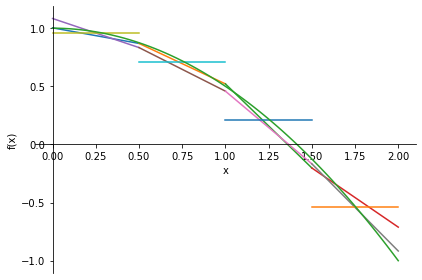

In [16]:
# 拉格朗日法
s1 = 1.00297585714286
s2 = 0.869047285714286
s3 = 0.520833
s4 = -0.202381285714284
s5 = -0.711309857142858

sr1L = N11*s1 + N21*s2
sr2L = N12*s2 + N22*s3
sr3L = N13*s3 + N23*s4
sr4L = N14*s4 + N24*s5

# 超收敛分片重构
s1 = 1.083333
s2 = 0.833333
s3 = 0.458333
s4 = -0.166667
s5 = -0.916667

sr1P = N11*s1 + N21*s2
sr2P = N12*s2 + N22*s3
sr3P = N13*s3 + N23*s4
sr4P = N14*s4 + N24*s5

sex = 1  - x**2/2

from sympy.plotting import plot
plot((sr1L,(x,0,0.5)),(sr2L,(x,0.5,1)),(sr3L,(x,1,1.5)),(sr4L,(x,1.5,2)),
     (sr1P,(x,0,0.5)),(sr2P,(x,0.5,1)),(sr3P,(x,1,1.5)),(sr4P,(x,1.5,2)),
     (se1,(x,0,0.5)),(se2,(x,0.5,1)),(se3,(x,1,1.5)),(se4,(x,1.5,2)),
     (sex, (x,0,2)))



In [24]:
L2L = sympy.sqrt(sympy.integrate((sr1L-sex)**2,(x,0,0.5)) + sympy.integrate((sr2L-sex)**2,(x,0.5,1)) +
      sympy.integrate((sr3L-sex)**2,(x,1,1.5)) + sympy.integrate((sr4L-sex)**2,(x,1.5,2)))
L2P = sympy.sqrt(sympy.integrate((sr1P-sex)**2,(x,0,0.5)) + sympy.integrate((sr2P-sex)**2,(x,0.5,1)) +
      sympy.integrate((sr3P-sex)**2,(x,1,1.5)) + sympy.integrate((sr4P-sex)**2,(x,1.5,2)))
print('L2L = ', L2L)
print('L2P = ', L2P)

L2L =  0.106462788790483
L2P =  0.0733620209054494
